In [1]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, log_loss,f1_score
import warnings
warnings.filterwarnings(action="ignore")

## Data Cleaning

In [2]:
# first 1 million data
df = pd.read_csv("result_1M.csv")
df.head()

,Unnamed: 0,store,sku,register,trannum,interid,saledate,style,quantity,orgprice,amt,amt2,seq,mic,unknown,cost,retail,unknown.1,discount
0,0,802,3,660,400,0,2005-08-09,P,1,440.0,30.00,30.00,4700000,599,0,123.36,440.0,0,0
1,1,1703,3,30,200,0,2005-08-09,P,1,440.0,30.00,30.00,4800000,999,0,123.36,440.0,0,0
2,2,1703,3,30,2400,0,2005-08-24,R,1,440.0,30.00,30.00,10100000,999,0,123.36,440.0,0,0
3,3,1707,3,160,1100,16200776,2005-07-20,P,1,440.0,1.99,1.99,7200000,931,0,123.36,440.0,0,0
4,4,2102,3,120,1700,0,2005-06-15,R,1,440.0,30.00,30.00,4600000,521,0,123.36,440.0,0,0


In [8]:
df.columns

Index(['Unnamed: 0', 'store', 'sku', 'register', 'trannum', 'interid',
       'saledate', 'style', 'quantity', 'orgprice', 'amt', 'amt2', 'seq',
       'mic', 'unknown', 'cost', 'retail', 'unknown.1', 'discount'],
      dtype='object')

In [3]:
# Drop the columns don't have to do with predictions such as Unnamed
df = df.drop(columns = ['Unnamed: 0', 'amt2', 'unknown', 'unknown.1'])
df.head(20)

,store,sku,register,trannum,interid,saledate,style,quantity,orgprice,amt,seq,mic,cost,retail,discount
0,802,3,660,400,0,2005-08-09,P,1,440.00,30.00,4700000,599,123.36,440.00,0
1,1703,3,30,200,0,2005-08-09,P,1,440.00,30.00,4800000,999,123.36,440.00,0
2,1703,3,30,2400,0,2005-08-24,R,1,440.00,30.00,10100000,999,123.36,440.00,0
3,1707,3,160,1100,16200776,2005-07-20,P,1,440.00,1.99,7200000,931,123.36,440.00,0
4,2102,3,120,1700,0,2005-06-15,R,1,440.00,30.00,4600000,521,123.36,440.00,0
5,2102,3,950,800,0,2005-06-15,P,1,440.00,30.00,4700000,521,123.36,440.00,0
6,2804,3,360,5900,0,2005-05-09,R,1,440.00,30.00,2900000,202,123.36,440.00,0
7,2804,3,540,9800,0,2005-04-23,P,1,440.00,30.00,7900000,202,123.36,440.00,0
8,4403,3,440,2700,0,2005-04-17,P,1,440.00,30.00,3700000,690,123.36,440.00,0
9,4603,3,100,1200,0,2005-04-12,R,1,440.00,30.00,3400000,333,123.36,440.00,0


In [133]:
import numpy as np
np.mean(df[df['sku'] == 112307]['discount'])

0.9978638432246679

In [23]:
df['discount'].value_counts()

0    540746
1    459254
Name: discount, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   store     1000000 non-null  int64  
 1   sku       1000000 non-null  int64  
 2   register  1000000 non-null  int64  
 3   trannum   1000000 non-null  int64  
 4   interid   1000000 non-null  int64  
 5   saledate  1000000 non-null  object 
 6   style     1000000 non-null  object 
 7   quantity  1000000 non-null  int64  
 8   orgprice  1000000 non-null  float64
 9   amt       1000000 non-null  float64
 10  seq       1000000 non-null  int64  
 11  mic       1000000 non-null  int64  
 12  cost      1000000 non-null  float64
 13  retail    1000000 non-null  float64
 14  discount  1000000 non-null  int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 114.4+ MB


In [5]:
df.isna().sum()

store       0
sku         0
register    0
trannum     0
interid     0
saledate    0
style       0
quantity    0
orgprice    0
amt         0
seq         0
mic         0
cost        0
retail      0
discount    0
dtype: int64

In [6]:
# Convert flight date to a date variable
df['saledate'] = pd.to_datetime(df['saledate'])
df['saledate']

0        2005-08-09
1        2005-08-09
2        2005-08-24
3        2005-07-20
4        2005-06-15
            ...    
999995   2005-03-19
999996   2005-05-04
999997   2005-04-18
999998   2005-03-26
999999   2005-03-25
Name: saledate, Length: 1000000, dtype: datetime64[ns]

In [7]:
# create saleyear and salemonth 
df['saleyear'] = pd.DatetimeIndex(df['saledate']).year
df['salemonth'] = pd.DatetimeIndex(df['saledate']).month
df.head()

,store,sku,register,trannum,interid,saledate,style,quantity,orgprice,amt,seq,mic,cost,retail,discount,saleyear,salemonth
0,802,3,660,400,0,2005-08-09,P,1,440.0,30.00,4700000,599,123.36,440.0,0,2005,8
1,1703,3,30,200,0,2005-08-09,P,1,440.0,30.00,4800000,999,123.36,440.0,0,2005,8
2,1703,3,30,2400,0,2005-08-24,R,1,440.0,30.00,10100000,999,123.36,440.0,0,2005,8
3,1707,3,160,1100,16200776,2005-07-20,P,1,440.0,1.99,7200000,931,123.36,440.0,0,2005,7
4,2102,3,120,1700,0,2005-06-15,R,1,440.0,30.00,4600000,521,123.36,440.0,0,2005,6


In [20]:
# check the value of quantity
df['quantity'].value_counts()

1    1000000
Name: quantity, dtype: int64

## Data Visualization

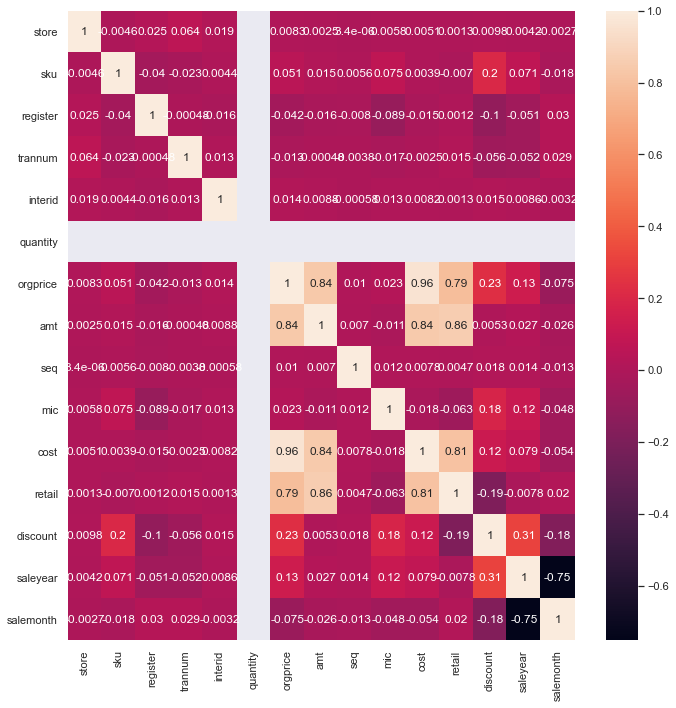

In [141]:
cmap = sns.set(style = "darkgrid") 

f,ax = plt.subplots(figsize=(10, 10))

sns.heatmap(df.corr(), cmap=cmap, annot=True)

f.tight_layout()

## Feature Engineering

In [8]:
# Pick features that avoid data leackage
features = ['store',
            'sku',
            'cost',
            'amt',
            'style',
            'salemonth',
            'saleyear' ]

In [9]:
# Name a new variable X as the dataset of features selected for logistic models
X = df[features]
X

,store,sku,cost,amt,style,salemonth,saleyear
0,802,3,123.36,30.00,P,8,2005
1,1703,3,123.36,30.00,P,8,2005
2,1703,3,123.36,30.00,R,8,2005
3,1707,3,123.36,1.99,P,7,2005
4,2102,3,123.36,30.00,R,6,2005
...,...,...,...,...,...,...,...
999995,5404,133048,18.75,9.10,P,3,2005
999996,5404,133048,18.75,2.99,P,5,2005
999997,5404,133048,18.75,13.00,P,4,2005
999998,5404,133048,18.75,13.00,R,3,2005


In [10]:
# Use LabelEncoder to apply OneHot Encoding to non-numerical values from X
label_encoder = LabelEncoder()
X['style'] = label_encoder.fit_transform(X['style'])

# Display the Encoded X
X

,store,sku,cost,amt,style,salemonth,saleyear
0,802,3,123.36,30.00,0,8,2005
1,1703,3,123.36,30.00,0,8,2005
2,1703,3,123.36,30.00,1,8,2005
3,1707,3,123.36,1.99,0,7,2005
4,2102,3,123.36,30.00,1,6,2005
...,...,...,...,...,...,...,...
999995,5404,133048,18.75,9.10,0,3,2005
999996,5404,133048,18.75,2.99,0,5,2005
999997,5404,133048,18.75,13.00,0,4,2005
999998,5404,133048,18.75,13.00,1,3,2005


In [11]:
# Declare the dependent and independent variables for classification models
x = X.values
y = df.discount.values

In [12]:
# Split the dataframe into training and testing sets using downsampled data
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    train_size = 0.8, 
                                                    random_state = 999)

## Random Forest

In [13]:
rf_classifier = RandomForestClassifier(n_estimators=75)
rf_classifier = rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

In [14]:
print("The accuracy of Random Forest prediction is", 
      '{:.2%}'.format(accuracy_score(y_test, rf_predictions)))
print("The f1 score of Random Forest prediction is", 
      '{:.2%}'.format(f1_score(y_test, rf_predictions, average='weighted')))

The accuracy of Random Forest prediction is 98.87%
The f1 score of Random Forest prediction is 98.87%
